In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from dtw import *
from pykrx import stock
from datetime import datetime, timedelta

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df_1 = pd.read_csv("AE_abs_3.csv")
df_1.head()

,Date,Close,Volume,Institutional Vo.,Individual Vo.,Foreign Vo.
0,1999-01-06,0.1190,0.1960,0.0309,0.0132,0.2040
1,1999-01-07,0.0598,0.0728,0.0506,0.1220,0.0427
2,1999-01-08,0.0664,0.0177,0.0430,0.0387,0.0548
3,1999-01-11,0.1040,0.0183,0.0413,0.0106,0.1530
4,1999-01-12,0.1100,0.0042,0.0443,0.1120,0.1340


In [3]:
df_2 = pd.read_csv("AE_abs_4.csv")
df_2.head()

,Date,Close,Volume,Institutional Vo.,Individual Vo.,Foreign Vo.
0,1999-01-06,0.04140,0.0378,0.05800,0.02510,0.02420
1,1999-01-07,0.05190,0.0171,0.02580,0.02830,0.00256
2,1999-01-08,0.00411,0.0181,0.00828,0.03740,0.01500
3,1999-01-11,0.00439,0.0349,0.00357,0.00396,0.00863
4,1999-01-12,0.03970,0.0395,0.04890,0.03460,0.01510


In [32]:
X = df_1.index[4210:]
y_4 = df_1["Institutional Vo."][4210:]
y_5 = df_2["Institutional Vo."][4210:]

C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


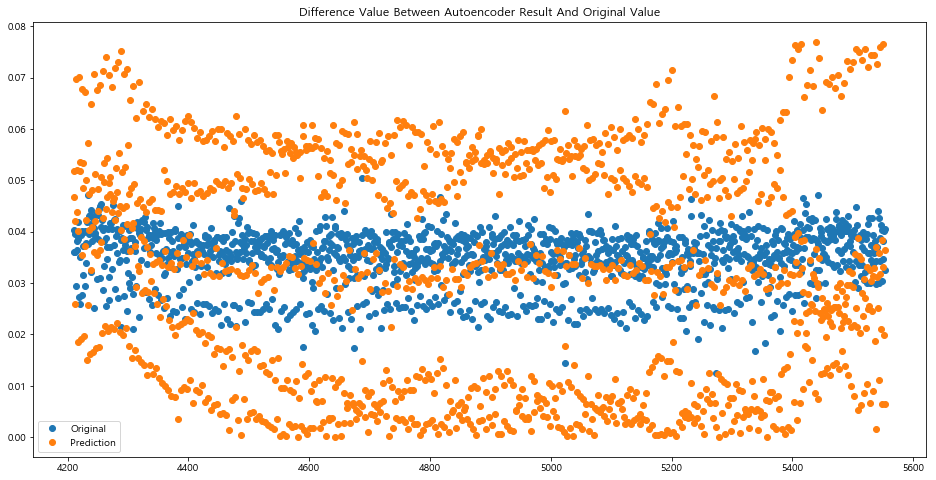

In [33]:
plt.figure(figsize = (16, 8))
#plt.plot(X, y_1, 'o')
#plt.plot(X, y_2, 'o')
#plt.plot(X, y_3, 'o')
plt.plot(X, y_4, 'o')
plt.plot(X, y_5, 'o')
plt.title("Difference Value Between Autoencoder Result And Original Value")
plt.legend(["Original", "Prediction"])

In [34]:
linear_C1 = LinearRegression()
linear_C1.fit(X.values.reshape(-1,1), y_4)
linear_C2 = LinearRegression()
linear_C2.fit(X.values.reshape(-1,1), y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

C:\Users\crara\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\crara\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

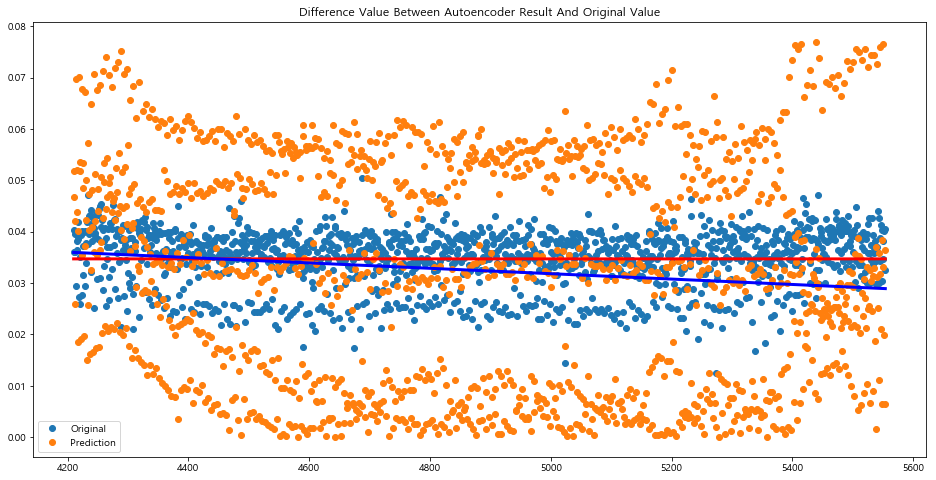

In [35]:
plt.figure(figsize = (16, 8))
plt.plot(X, y_4, 'o')
plt.plot(X, y_5, 'o')
line_1 = plt.plot(X, linear_C1.predict(X.values.reshape(-1,1)))
line_2 = plt.plot(X, linear_C2.predict(X.values.reshape(-1,1)))
plt.setp(line_1, color  ='r', linewidth = 3.0)
plt.setp(line_2, color  ='b', linewidth = 3.0)
plt.title("Difference Value Between Autoencoder Result And Original Value")
plt.legend(["Original", "Prediction"])
plt.show()